In [1]:
import numpy as np
import pandas as pd
print("Import Complete!")

Import Complete!


In [5]:
#1 How likely is it that you roll doubles when rolling two dice?
sim = 10_000
def dice_roll():
    return np.random.choice([1,2,3,4,5,6], size = sim)
first = dice_roll()
second = dice_roll()
doubles = first == second
double = np.count_nonzero(doubles)
roll_doubles = double/sim*100
print(roll_doubles,'%')
    

17.31 %


In [9]:
#2 If you flip 8 coins, what is the probability of getting exactly 3 
#heads? What is the probability of getting more than 3 heads?
flips = np.random.choice(["Heads", "Tails",
                          "Heads", "Tails",
                          "Heads", "Tails",
                          "Heads", "Tails",
                          "Heads", "Tails",
                          "Heads", "Tails",
                          "Heads", "Tails",
                          "Heads", "Tails"], size=10_000)
head3 = (flips == "Heads") == 3
heads3 = np.count_nonzero(head3)
heads3

#alt approach
n_trials = nrows = 10_000
n_coins = ncols = 8
##Lines it up into an array
flips1 = np.random.choice([0,1], n_trials * n_coins).reshape(nrows, ncols)
flips1
##gets the sum of each row ie; heads = 1, tails = 0
sums_by_trial = flips1.sum(axis=1)
sums_by_trial
##finds all rows that had only 3 heads
exactly_3 = sums_by_trial == 3
exactly_3
##gets the average of all the rows that equaled 3 and averages it out to the complete array
exactly_3_rate = exactly_3.astype(int).mean()
exactly_3_rate

0.2215

In [15]:
#3 There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. 
#Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds 
#that the two billboards I drive past both have data science students on them?

#setup the probability
prob = [.75, .25]
#line it up for 10_000 tries 
flips = np.random.choice(['webdev', 'ds'], size = 10_000, p = prob)
#line up the average ds comes out
probs = (flips == 'ds').mean()
#squareing it for 2 ds people
probs**2

0.06240004

In [25]:
#4 Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the 
#snack vending machine. If on monday the machine is restocked with 17 poptart 
#packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

#using random normal for given SD of 1.5
poptarts = np.random.normal(3, 1.5 , size =(10_000,5))
poptarts
# this is 1 week
poptarts[0]
#axis 1 sums each row
weekly_demand = poptarts.sum(axis=1)
#if weekly demand is less than 17 then there are poptarts on friday
(weekly_demand < 17).mean()

0.7181

In [28]:
#5 Men have an average height of 178 cm and standard deviation of 8cm
#Women have a mean of 170, sd = 6cm.
#If a man and woman are chosen at random, P(woman taller than man)?
trials = 100_000
m = np.random.normal(178, 8, trials)
f = np.random.normal(170, 6, trials)
m < f
(m<f).mean()

0.21112

In [32]:
#6 When installing anaconda on a student's computer, there's a 1 in 250 
#chance that the download is corrupted and the installation fails. What 
#are the odds that after having 50 students download anaconda, no one 
#has an installation issue? 100 students?

#50 students
trials = 100_000
students_per_trial = 50
installs = np.random.choice([0,1], size=(trials, students_per_trial), p=[1/250, 249/250])
df=pd.DataFrame(installs)
df.head()
df['all_good'] = df.sum(axis=1) == students_per_trial
df.all_good.mean()

0.81905

In [33]:
#100 students
trials = 100_000
students_per_trial = 100
installs = np.random.choice([0,1], size=(trials, students_per_trial), p=[1/250, 249/250])
df=pd.DataFrame(installs)
df.head()
df['all_good'] = df.sum(axis=1) == students_per_trial
df.all_good.mean()

0.67055

In [36]:
#What is the probability that we observe an installation issue within 
#the first 150 students that download anaconda?
students_per_trial = 150
installs = np.random.choice([0,1], size=(trials, students_per_trial), p=[1/250, 249/250])
df=pd.DataFrame(installs)
df.head()
df['failures'] = df.sum(axis=1) < students_per_trial
df.failures.mean()

0.45393

In [37]:
#How likely is it that 450 students all download anaconda without an issue?
students_per_trial = 450
installs = np.random.choice([0,1], size=(trials, students_per_trial), p=[1/250, 249/250])
df=pd.DataFrame(installs)
df.head()
df['all_good'] = df.sum(axis=1) == students_per_trial
df.all_good.mean()

0.16526

In [42]:
#7 There's a 70% chance on any given day that there will be at 
#least one food truck at Travis Park. However, you haven't 
#seen a food truck there in 3 days. How unlikely is this?

trucks = np.random.choice([1,0], size=(100_000, 3), p=[.7,.3])
df = pd.DataFrame(trucks)
df.columns = ['day1', 'day2', 'day3']
df.head()
df['appearances'] = df.day1 + df.day2 + df.day3
df.head()
(df.appearances == 0).mean()

0.02676

In [43]:
#How likely is it that a food truck will show up sometime this week?
trucks = np.random.choice([1,0], size=(100_000, 7), p=[.7,.3])
df = pd.DataFrame(trucks)
df['appearances'] = df.sum(axis=1)
(df.appearances > 0).mean()

0.99983

In [51]:
#8 If 23 people are in the same room, what are the odds that two of them 
#share a birthday? What if it's 20 people? 40?
nsim = 100_000
npeople = 23
birthdays = np.random.choice(range(365), size = (nsim, npeople))
df = pd.DataFrame(birthdays)
df.head()
df['n_unique'] = df.nunique(axis=1)
1 - (df.n_unique != 23).mean()

0.49316000000000004

In [55]:
# What about 20 people in the room?
# What is probability that two people share a birthday
nsim = 100_000
npeople = 20
birthdays = np.random.choice(range(365), size = (nsim, npeople))
df = pd.DataFrame(birthdays)
df.head()
df['n_unique'] = df.nunique(axis=1)
(df.n_unique != npeople).mean()

0.41236

In [56]:
# What about 40 people in the room?
# What is probability that two people share a birthday
nsim = 100_000
npeople = 40
birthdays = np.random.choice(range(365), size = (nsim, npeople))
df = pd.DataFrame(birthdays)
df.head()
df['n_unique'] = df.nunique(axis=1)
(df.n_unique != npeople).mean()

0.88866

Text(0, 0.5, 'Probability')

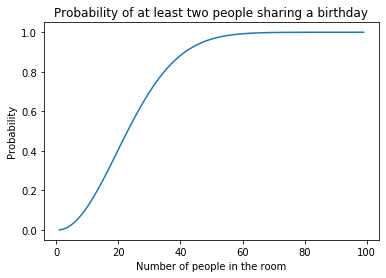

In [57]:
#Graph it
# What if we have rooms of increasing size

x = range(1, 100)

# N will be a list of N for each room size
N = [n * (n-1) / 2 for n in x]

# Get the probability for each N
y = [1 - (364/365)**n for n in N]

import matplotlib.pyplot as plt

plt.title("Probability of at least two people sharing a birthday")
plt.plot(x, y)
plt.xlabel("Number of people in the room")
plt.ylabel("Probability")